List of stocks (across different sectors) considered for the project

In [27]:
stocks = [
    'AAP',
    'AAPL',
    'ABBV',
    'ABT',
    'ADBE',
    'ADDYY',
    'ADI',
    'AMAT',
    'AMD',
    'AMGN',
    'AMZN',
    'BA',
    'BABA',
    'BAC',
    'BAESY',
    'BMW',
    'BMY',
    'BSX',
    'BTI',
    'CAT',
    'CL',
    'COLM',
    'CRM',
    'CRSP',
    'CSCO',
    'CVX',
    'DAI',
    'DAL',
    'DIS',
    'DKNG',
    'DUK',
    'EADSY',
    'EBAY',
    'EW',
    'F',
    'FL',
    'GE',
    'GILD',
    'GM',
    'GOLD',
    'GOOGL',
    'GPS',
    'GS',
    'HCA',
    'HD',
    'HELE',
    'HON',
    'IBM',
    'INFY',
    'INTC',
    'ITC',
    'JNJ',
    'JPM',
    'KO',
    'LLY',
    'LULU',
    'MA',
    'MANU',
    'MCD',
    'META',
    'MMM',
    'MRK',
    'MSFT',
    'MSGS',
    'MU',
    'NFLX',
    'NKE',
    'NOC',
    'NSANY',
    'NUS',
    'NVDA',
    'ORCL',
    'PFE',
    'PG',
    'PTON',
    'PYPL',
    'QCOM',
    'RACE',
    'RTX',
    'SQ',
    'T',
    'TGT',
    'THLLY',
    'TMO',
    'TXN',
    'UAA',
    'UNH',
    'V',
    'VRTX',
    'VZ',
    'WFC',
    'WMT',
    'XOM'
]



Adding a DailyReturn and Volatility column

In [28]:
import pandas as pd
all_data = pd.DataFrame()

for stock in stocks:
    df = pd.read_csv(f'{stock}.csv')
    df[f'DailyReturn'] = df['Adj Close'].pct_change()
    df.columns = [f'{stock}_{col}' if col != 'Date' else 'Date' for col in df.columns]
    df[f'{stock}_Volatility'] = df[f'{stock}_High'] - df[f'{stock}_Low']
    
    all_data = pd.concat([all_data, df], axis=1)

all_data = all_data.loc[:, ~all_data.columns.duplicated()]
print(all_data.head())


         Date  AAP_Year  AAP_Month  AAP_Day AAP_Weekday  AAP_Week_Number  \
0  2018-01-02      2018          1        2     Tuesday                0   
1  2018-01-03      2018          1        3   Wednesday                0   
2  2018-01-04      2018          1        4    Thursday                0   
3  2018-01-05      2018          1        5      Friday                0   
4  2018-01-08      2018          1        8      Monday                1   

  AAP_Year_Week  AAP_Open  AAP_High  AAP_Low  ...  XOM_High  XOM_Low  \
0       2018-00    100.90    107.93    99.71  ...     85.20    83.66   
1       2018-00    106.42    107.66   105.30  ...     86.97    84.82   
2       2018-00    107.75    111.53   107.48  ...     87.22    86.43   
3       2018-00    111.96    113.15   110.30  ...     86.88    85.71   
4       2018-01    112.05    112.29   110.64  ...     87.15    86.60   

   XOM_Close  XOM_Volume  XOM_Adj Close  XOM_Return  XOM_Short_MA  \
0      85.03    11469300          63.22  

Normalizing the data

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.DataFrame()
data['Date'] = all_data['Date']
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

for stock in stocks:
    dailyreturn = all_data[f'{stock}_DailyReturn'].values.reshape(-1, 1)
    dailyvolatility = all_data[f'{stock}_Volatility'].values.reshape(-1, 1)
    
    normalized_data1 = scaler2.fit_transform(dailyreturn)
    normalized_data2 = scaler1.fit_transform(dailyvolatility)

    data[f'{stock}_DailyReturn'] = normalized_data1.flatten()
    data[f'{stock}_Volatility'] = normalized_data2.flatten()

# Print the combined data
print(data.head())


         Date  AAP_DailyReturn  AAP_Volatility  AAPL_DailyReturn  \
0  2018-01-02              NaN        0.366968               NaN   
1  2018-01-03         0.395451        0.072791         -0.054108   
2  2018-01-04         1.679777        0.157631          0.155564   
3  2018-01-05         0.462632        0.097390          0.490959   
4  2018-01-08        -0.351544        0.037149         -0.226089   

   AAPL_Volatility  ABBV_DailyReturn  ABBV_Volatility  ABT_DailyReturn  \
0         0.042164               NaN         0.107527              NaN   
1         0.032617          0.824628         0.101478         0.080993   
2         0.008751         -0.354591         0.081989        -0.141945   
3         0.027049          0.926092         0.140457         0.136712   
4         0.014320         -0.934399         0.171371        -0.219651   

   ABT_Volatility  ADBE_DailyReturn  ...  VRTX_DailyReturn  VRTX_Volatility  \
0        0.113739               NaN  ...               NaN         

/var/folders/2k/jsqg968s21qdj1kdn76ktvvw0000gn/T/ipykernel_8602/3780501603.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_Volatility'] = normalized_data2.flatten()
/var/folders/2k/jsqg968s21qdj1kdn76ktvvw0000gn/T/ipykernel_8602/3780501603.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_DailyReturn'] = normalized_data1.flatten()
/var/folders/2k/jsqg968s21qdj1kdn76ktvvw0000gn/T/ipykernel_8602/3780501603.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [61]:
dataset = df.to_csv('data.csv')

Defining the quarters

In [30]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'])

data['Quarter'] = data['Date'].dt.to_period("Q")

data['Quarter'].unique

/var/folders/2k/jsqg968s21qdj1kdn76ktvvw0000gn/T/ipykernel_8602/2130098426.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Quarter'] = data['Date'].dt.to_period("Q")


<bound method Series.unique of 0       2018Q1
1       2018Q1
2       2018Q1
3       2018Q1
4       2018Q1
         ...  
1254    2022Q4
1255    2022Q4
1256    2022Q4
1257    2022Q4
1258    2022Q4
Name: Quarter, Length: 1259, dtype: period[Q-DEC]>

In [31]:
quarter = '2020Q3'

quarterly_df = pd.DataFrame()
quarterly_df['Stock_ID'] = [f'{stock}' for stock in stocks]
quarterly_df

,Stock_ID
0,AAP
1,AAPL
2,ABBV
3,ABT
4,ADBE
...,...
88,VRTX
89,VZ
90,WFC
91,WMT


Filtering the dataframe for selected quarter and stocks

In [32]:
quarter = '2018Q1'
#selected_stocks = ['AAP', 'ADBE', 'ADDYY', 'AMZN', 'BSX', 'COLM', 'CRM', 'CRSP', 'EADSY', 'EBAY', 'EW', 'INFY', 'INTC', 'MA', 'MSGS', 'NFLX', 'NOC', 'NUS', 'NVDA', 'PTON', 'RACE', 'SQ']

# Filter the DataFrame for the selected quarter and stocks
x = data[(data['Quarter'] == quarter)]

x

,Date,AAP_DailyReturn,AAP_Volatility,AAPL_DailyReturn,AAPL_Volatility,ABBV_DailyReturn,ABBV_Volatility,ABT_DailyReturn,ABT_Volatility,ADBE_DailyReturn,...,VRTX_Volatility,VZ_DailyReturn,VZ_Volatility,WFC_DailyReturn,WFC_Volatility,WMT_DailyReturn,WMT_Volatility,XOM_DailyReturn,XOM_Volatility,Quarter
0,2018-01-02,NaN,0.366968,NaN,0.042164,NaN,0.107527,NaN,0.113739,NaN,...,0.164259,NaN,0.112033,NaN,0.093541,NaN,0.059587,NaN,0.203509,2018Q1
1,2018-01-03,0.395451,0.072791,-0.054108,0.032617,0.824628,0.101478,0.080993,0.038288,0.763364,...,0.139163,-1.649826,0.192946,0.319538,0.095768,0.562610,0.056532,0.890276,0.310526,2018Q1
2,2018-01-04,1.679777,0.157631,0.155564,0.008751,-0.354591,0.081989,-0.141945,0.052928,0.477051,...,0.041065,0.265561,0.172199,0.530801,0.200445,0.028603,0.029030,0.035346,0.071930,2018Q1
3,2018-01-05,0.462632,0.097390,0.490959,0.027049,0.926092,0.140457,0.136712,0.009009,0.457096,...,0.075665,-0.185440,0.062241,0.280649,0.106904,0.368201,0.021390,-0.066526,0.138596,2018Q1
4,2018-01-08,-0.351544,0.037149,-0.226089,0.014320,-0.934399,0.171371,-0.219651,0.009009,-0.102008,...,0.098859,-0.144852,0.099585,-0.487246,0.122494,0.966117,0.080214,0.180819,0.029825,2018Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2018-03-23,-0.384155,0.100904,-1.154710,0.079554,-0.402439,0.161290,-1.424010,0.154279,-1.090652,...,0.169962,-1.022539,0.213693,-1.257893,0.349666,-1.368881,0.146677,-0.421173,0.203509,2018Q1
57,2018-03-26,1.611618,0.114458,2.199386,0.113763,-1.280303,0.510753,1.516189,0.123874,2.704964,...,0.183270,1.355008,0.072614,1.091823,0.175947,1.612023,0.083270,0.681247,0.178947,2018Q1
58,2018-03-27,0.070839,0.163153,-1.268544,0.144789,-1.946065,0.272177,-0.811428,0.141892,-2.831513,...,0.293916,0.405570,0.172199,-0.965378,0.416481,-1.150069,0.158136,-0.215930,0.215789,2018Q1
59,2018-03-28,0.366969,0.222390,-0.576387,0.077168,1.318292,0.317204,-1.070672,0.130631,-0.283214,...,0.112928,1.168147,0.103734,0.311498,0.164811,1.322225,0.119175,-0.598129,0.149123,2018Q1


In [35]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])
data['Quarter'] = data['Date'].dt.to_period("Q")

unique_quarters = data['Quarter'].unique()
quarterly_dataframes = []

for quarter in unique_quarters:
    x = data[data['Quarter'] == quarter]

    average_data_list = []

    for stock in stocks:
        avg_daily_return = x[f'{stock}_DailyReturn'].mean()
        avg_volatility = x[f'{stock}_Volatility'].mean()

        average_data_list.append({
            'Stock': stock,
            'AvgDailyReturn': avg_daily_return,
            'AvgVolatility': avg_volatility
        })

    average_data = pd.DataFrame(average_data_list)

    quarterly_dataframes.append({
        'Quarter': quarter,
        'Data': average_data
    })

for quarter_data in quarterly_dataframes:
    print(f"Quarter: {quarter_data['Quarter']}")
    print(quarter_data['Data'])
    print("\n")


Quarter: 2018Q1
   Stock  AvgDailyReturn  AvgVolatility
0    AAP        0.072310       0.140710
1   AAPL       -0.064854       0.050211
2   ABBV       -0.043772       0.211231
3    ABT       -0.011569       0.085161
4   ADBE        0.113572       0.064534
..   ...             ...            ...
88  VRTX        0.025608       0.137892
89    VZ       -0.129471       0.152473
90   WFC       -0.100196       0.207967
91   WMT       -0.128065       0.119025
92   XOM       -0.118985       0.194018

[93 rows x 3 columns]


Quarter: 2018Q2
   Stock  AvgDailyReturn  AvgVolatility
0    AAP        0.080757       0.131534
1   AAPL        0.025761       0.036471
2   ABBV       -0.041900       0.107894
3    ABT       -0.016834       0.071632
4   ADBE        0.051058       0.064006
..   ...             ...            ...
88  VRTX        0.010922       0.109565
89    VZ        0.085785       0.128242
90   WFC        0.042483       0.165785
91   WMT       -0.060441       0.067442
92   XOM        0.05719

Removing Outliers

In [36]:
quarterly_df = quarterly_dataframes[18]['Data'].dropna()
quarterly_df = quarterly_df[quarterly_df['Stock'] != 'ITC']
quarterly_df = quarterly_df[quarterly_df['Stock'] != 'BMW']

/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: perf


Title for Quarter 1: 2018Q1
Centroid for Cluster 1: [-0.05463711  0.08129711]
Centroid for Cluster 2: [-0.07222881  0.19891626]
Centroid for Cluster 3: [0.03369462 0.19644587]
Centroid for Cluster 0: [0.09400003 0.09807244]

Title for Quarter 2: 2018Q2
Centroid for Cluster 2: [-0.01395122  0.06547969]
Centroid for Cluster 3: [-0.09244995  0.1257857 ]
Centroid for Cluster 0: [0.03831442 0.18038018]
Centroid for Cluster 1: [0.07912275 0.08336926]

Title for Quarter 3: 2018Q3
Centroid for Cluster 3: [-0.04794828  0.07892518]
Centroid for Cluster 1: [-0.04164537  0.16590619]
Centroid for Cluster 0: [0.05728836 0.07626094]
Centroid for Cluster 2: [0.14469646 0.07037583]

Title for Quarter 4: 2018Q4
Centroid for Cluster 1: [-0.23285066  0.13570735]
Centroid for Cluster 3: [-0.11459095  0.19005222]
Centroid for Cluster 2: [0.1392868  0.25314225]
Centroid for Cluster 0: [-0.01385103  0.1093732 ]

Title for Quarter 5: 2019Q1
Centroid for Cluster 3: [-0.05419824  0.09792748]
Centroid for Cluste

/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: perf


Title for Quarter 19: 2022Q3
Centroid for Cluster 2: [-0.16029861  0.13804387]
Centroid for Cluster 3: [-0.06422925  0.23890766]
Centroid for Cluster 1: [-0.01418412  0.1293584 ]
Centroid for Cluster 0: [0.12525449 0.12495977]

Title for Quarter 20: 2022Q4
Centroid for Cluster 2: [-0.07771972  0.16203506]
Centroid for Cluster 3: [0.00666469 0.24718638]
Centroid for Cluster 0: [0.1729271  0.26060852]
Centroid for Cluster 1: [0.13436177 0.13198732]


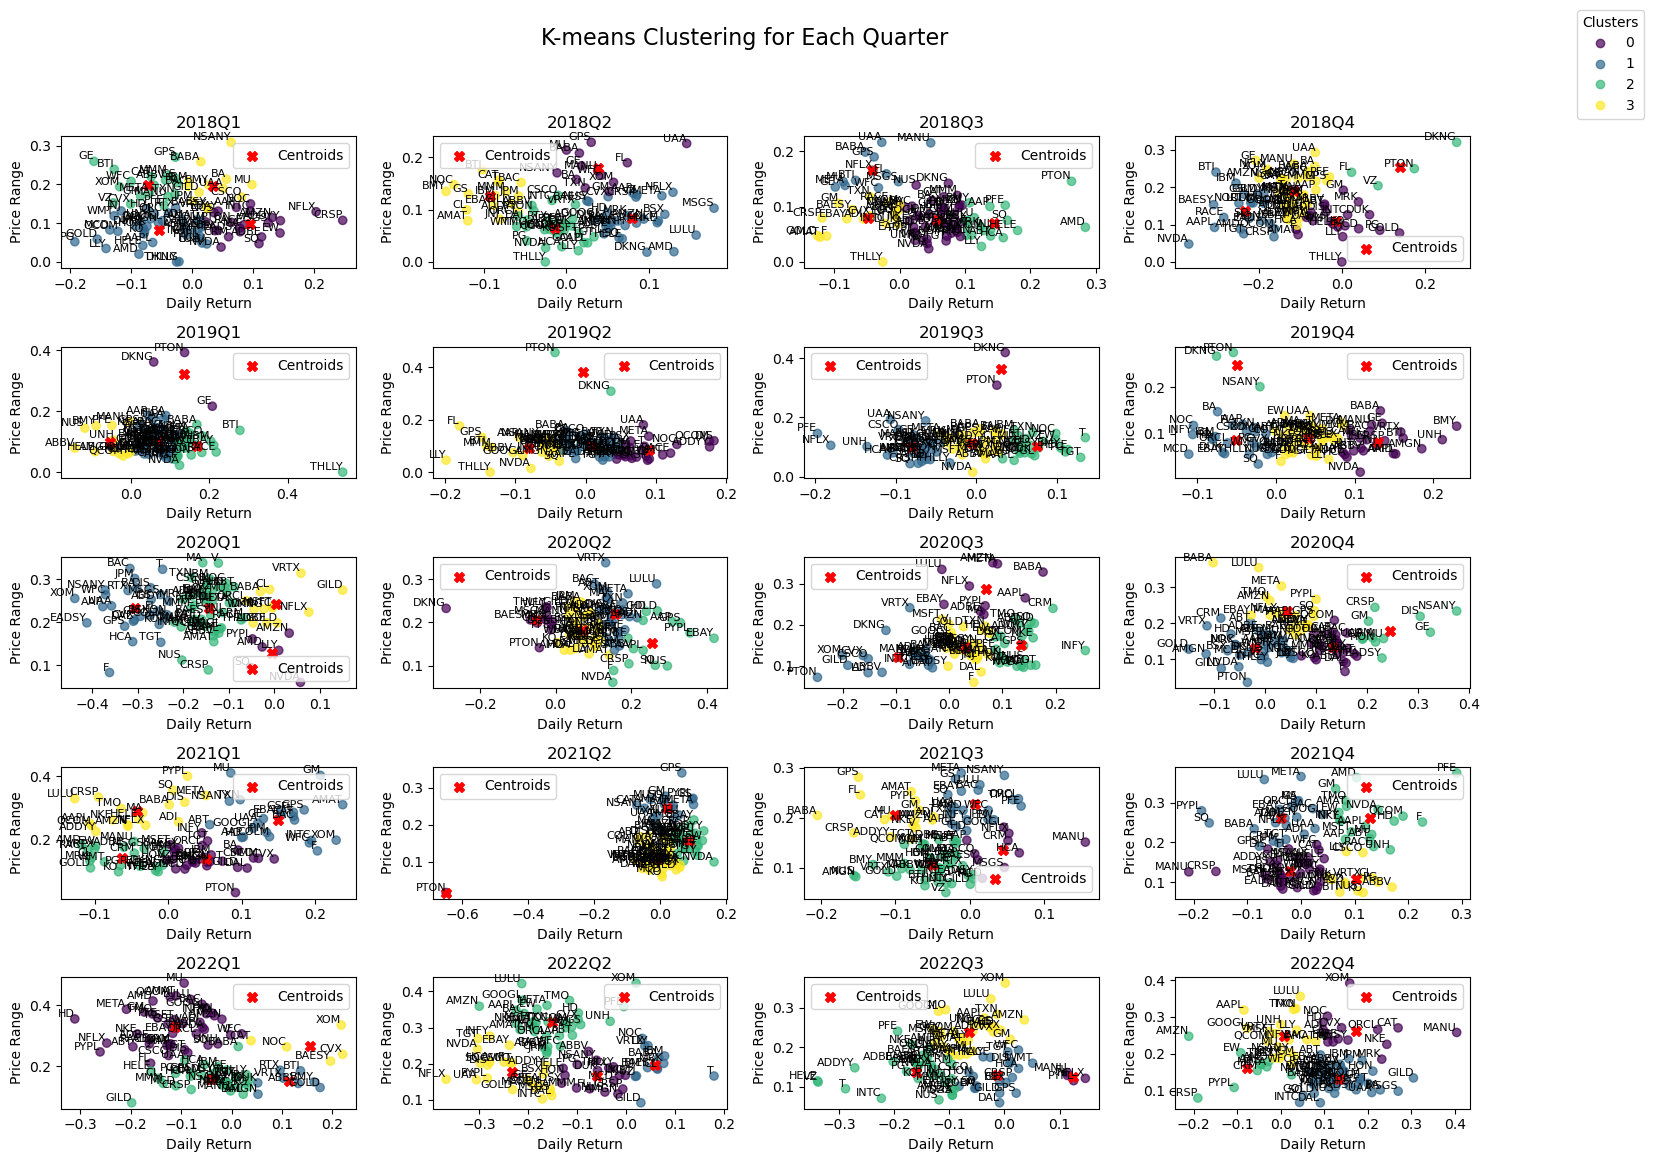


Result DataFrame:
   Quarter  Buy Cluster  Sell Cluster
0   2018Q1            0             1
1   2018Q2            1             3
2   2018Q3            2             3
3   2018Q4            2             1
4   2019Q1            2             3
5   2019Q2            0             3
6   2019Q3            2             1
7   2019Q4            0             1
8   2020Q1            0             1
9   2020Q2            2             0
10  2020Q3            2             1
11  2020Q4            2             1
12  2021Q1            0             2
13  2021Q2            2             0
14  2021Q3            0             2
15  2021Q4            3             0
16  2022Q1            1             2
17  2022Q2            1             3
18  2022Q3            0             2
19  2022Q4            1             2


In [37]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

result_data = []

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.suptitle('K-means Clustering for Each Quarter', fontsize=16)

axes = axes.flatten()

cluster_mapping = {}

for i, quarter_data in enumerate(quarterly_dataframes):

    df = quarter_data['Data'].dropna()

    # Remove specific stocks (ITC and BMW) since they are outliers
    df = df[(df['Stock'] != 'ITC') & (df['Stock'] != 'BMW')]

    # Perform K-means clustering
    features = df[['AvgDailyReturn', 'AvgVolatility']]
    init_centers = np.array([[-0.2, 0], [-0.2, 0.3], [0.3, 0.3], [0.3, 0]])
    kmeans = KMeans(n_clusters=4, init=init_centers)

    df['Cluster'] = kmeans.fit_predict(features)

    if i == 0:
        cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(df['Cluster'].unique())}
    else:
        # Update  mapping based on the clustering in the current quarter
        current_mapping = {old_label: new_label for new_label, old_label in enumerate(df['Cluster'].unique())}
        # Ensure consistency with the previous mapping
        cluster_mapping = {old_label: cluster_mapping[new_label] for old_label, new_label in current_mapping.items()}

    # Apply the new cluster labels
    df['Cluster'] = df['Cluster'].map(cluster_mapping)

    title = quarter_data['Quarter']
    print(f"\nTitle for Quarter {i + 1}: {title}")

    # Print coordinates of centroids
    centroids = kmeans.cluster_centers_
    for cluster_num, center in enumerate(centroids):
        print(f"Centroid for Cluster {cluster_mapping[cluster_num]}: {center}")

    # Determine Buy and Sell Clusters
    buy_cluster = cluster_mapping[np.argmax(centroids[:, 0] - centroids[:, 1])]
    sell_cluster = cluster_mapping[np.argmin(centroids[:, 0] + centroids[:, 1])]

    # Determine Stay Clusters
    stay_clusters = [cluster_mapping[label] for label in range(4) if label not in [buy_cluster, sell_cluster]]

    # Store cluster information in the result list
    result_data.append({
        'Quarter': title,
        'Buy Cluster': buy_cluster,
        'Sell Cluster': sell_cluster,
        'Stay Cluster': stay_clusters,
    })

    scatter = axes[i].scatter(df['AvgDailyReturn'], df['AvgVolatility'], c=df['Cluster'], cmap='viridis', alpha=0.7)

    for j, txt in enumerate(df['Stock']):
        axes[i].annotate(txt, (df['AvgDailyReturn'].iloc[j], df['AvgVolatility'].iloc[j]), fontsize=8, ha='right', va='bottom')

    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=50, c='red', marker='X', label='Centroids')

    axes[i].set_title(title)
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Price Range')
    axes[i].legend()

fig.legend(*scatter.legend_elements(), title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Clusteringforppt')
plt.show()
result_df = pd.DataFrame(result_data)

print("\nResult DataFrame:")
print(result_df.iloc[:, :3])




Printing the 'Buy' cluster and the 'Sell' Cluster for each quarter

In [38]:
result_df.iloc[:, :3]

,Quarter,Buy Cluster,Sell Cluster
0,2018Q1,0,1
1,2018Q2,1,3
2,2018Q3,2,3
3,2018Q4,2,1
4,2019Q1,2,3
5,2019Q2,0,3
6,2019Q3,2,1
7,2019Q4,0,1
8,2020Q1,0,1
9,2020Q2,2,0


In [33]:
'''
buy_cluster_data = {
    '2018Q1': ['AAP', 'ADBE', 'ADDYY', 'AMZN', 'BSX', 'COLM', 'CRM', 'CRSP', 'EADSY', 'EBAY', 'EW', 'INFY', 'INTC', 'MA', 'MSGS', 'NFLX', 'NOC', 'NUS', 'NVDA', 'PTON', 'RACE', 'SQ'],
    '2018Q2': ['AAP', 'ADBE', 'AMD', 'AMGN', 'AMZN', 'BAESY', 'BSX', 'COLM', 'CRM', 'CRSP', 'CVX', 'DIS', 'DKNG', 'GOOGL', 'HD', 'HELE', 'INFY', 'LULU', 'MA', 'META', 'MRK', 'MSGS', 'NFLX', 'NKE', 'NUS', 'PYPL', 'RACE', 'SQ', 'UNH', 'V', 'VZ'],
    '2018Q3': ['AAP', 'AAPL', 'ABT', 'AMD', 'BMY', 'BSX', 'EW', 'HCA', 'HELE', 'HON', 'JNJ', 'LLY', 'LULU', 'MRK', 'ORCL', 'PFE', 'PTON', 'QCOM', 'SQ'],
    '2018Q4': ['DKNG', 'FL', 'PTON', 'VZ'],
    '2019Q1': ['ADI', 'AMD', 'BABA', 'BTI', 'CL', 'COLM', 'CSCO', 'EADSY', 'EBAY', 'EW', 'HON', 'IBM', 'LULU', 'MA', 'META', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PYPL', 'RACE', 'RTX', 'TGT', 'THLLY', 'TMO', 'V'],
    '2019Q2': ['ADDYY', 'AMAT', 'BSX', 'CRSP', 'DAL', 'DIS', 'F', 'GOLD', 'HELE', 'HON', 'JPM', 'KO', 'MCD', 'META', 'MSFT', 'NOC', 'PYPL', 'QCOM', 'RACE', 'T', 'UAA', 'V', 'WMT'],
    '2019Q3': ['AAPL', 'AMAT', 'BAESY', 'BMY', 'BTI', 'DUK', 'EW', 'GOLD', 'GOOGL', 'HD', 'HELE', 'IBM', 'INTC', 'KO', 'MU', 'NKE', 'NOC', 'PG', 'T', 'TGT', 'TXN', 'VZ', 'WFC', 'WMT'],
    '2019Q4': ['AAPL', 'ABBV', 'ADBE', 'AMAT', 'AMD', 'AMGN', 'BABA', 'BAC', 'BMY', 'BTI', 'CAT', 'CRSP', 'GE', 'HCA', 'INTC', 'JNJ', 'JPM', 'MANU', 'MMM', 'MU', 'NVDA', 'TGT', 'UNH', 'VRTX'],
    '2020Q1': ['AMD', 'AMZN', 'LLY', 'NVDA', 'PYPL', 'SQ'],
    '2020Q2': ['AAP', 'AAPL', 'ABBV', 'ADBE', 'AMZN', 'CRSP', 'EBAY', 'F', 'GOLD', 'GPS', 'HD', 'NUS', 'NVDA', 'PYPL', 'SQ'],
    '2020Q3': ['ABT', 'ADDYY', 'AMD', 'CAT', 'CRM', 'DIS', 'DUK', 'GM', 'GPS', 'HCA', 'HON', 'INFY', 'KO', 'MCD', 'NKE', 'NUS', 'NVDA', 'PFE', 'PG', 'QCOM', 'SQ', 'TGT', 'TMO', 'VZ', 'WMT'],
    '2020Q4': ['CRSP', 'DIS', 'EADSY', 'GE', 'GM', 'GS', 'HON', 'JPM', 'MU', 'NSANY', 'UAA'],
    '2021Q1': ['AMGN', 'BA', 'BAESY', 'BMY', 'BSX', 'BTI', 'CSCO', 'CVX', 'DAL', 'DUK', 'EADSY', 'GILD', 'HCA', 'HON', 'IBM', 'INFY', 'JNJ', 'LLY', 'MCD', 'MMM', 'MSFT', 'NOC', 'ORCL', 'PTON', 'RTX', 'T', 'TGT', 'UNH', 'VZ'],
    '2021Q2': ['AAP', 'AAPL', 'ADBE', 'ADDYY', 'ADI', 'AMZN', 'CRM', 'CRSP', 'EBAY', 'EW', 'F', 'GOOGL', 'HELE', 'IBM', 'INFY', 'LLY', 'MSFT', 'NKE', 'NOC', 'NVDA', 'ORCL', 'PFE', 'TGT', 'V', 'WFC', 'XOM'],
    '2021Q3': ['AAP', 'BAESY', 'CRM', 'CSCO', 'GOOGL', 'HCA', 'MANU', 'MCD', 'MSGS', 'NFLX'],
    '2021Q4': ['ABBV', 'BTI', 'CL', 'CSCO', 'CVX', 'DUK', 'JNJ', 'KO', 'LLY', 'MCD', 'NUS', 'PG', 'VRTX'],
    '2022Q1': ['ABBV', 'AMGN', 'BMY', 'BTI', 'DUK', 'GOLD', 'RTX', 'VRTX'],
    '2022Q2': ['BABA', 'BAESY', 'BMY', 'BTI', 'CL', 'GILD', 'IBM', 'LLY', 'MRK', 'NOC', 'T', 'VRTX', 'VZ'],
    '2022Q3': ['FL', 'MANU', 'NFLX', 'PYPL'],
    '2022Q4': ['ABBV', 'ABT', 'ADBE', 'ADDYY', 'AMGN', 'BA', 'BABA', 'BSX', 'BTI', 'CL', 'COLM', 'CSCO', 'DAL', 'DUK', 'EADSY', 'EBAY', 'FL', 'GE', 'GILD', 'GOLD', 'GPS', 'HCA', 'HELE', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MSGS', 'NFLX', 'NUS', 'NVDA', 'PG', 'RACE', 'RTX', 'SQ', 'T', 'UAA', 'VZ', 'WMT'],
}
'''
quarter = '2022Q4'
x = data[(data['Quarter'] == quarter)]

stocks1 = ['ABBV', 'ABT', 'ADBE', 'ADDYY', 'AMGN', 'BA', 'BABA', 'BSX', 'BTI', 'CL', 'COLM', 'CSCO', 'DAL', 'DUK', 'EADSY', 'EBAY', 'FL', 'GE', 'GILD', 'GOLD', 'GPS', 'HCA', 'HELE', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MSGS', 'NFLX', 'NUS', 'NVDA', 'PG', 'RACE', 'RTX', 'SQ', 'T', 'UAA', 'VZ', 'WMT']

average_data = pd.DataFrame(columns=['Stock', 'AvgDailyReturn'])

for stock in stocks1:
    avg_daily_return = x[f'{stock}_DailyReturn'].mean()
    average_data = pd.concat([average_data, pd.DataFrame({'Stock': [stock], 'AvgDailyReturn': [avg_daily_return]})], ignore_index=True)

print(average_data)
print(average_data['AvgDailyReturn'].mean())

    Stock  AvgDailyReturn
0    ABBV        0.136342
1     ABT        0.091223
2    ADBE        0.115842
3   ADDYY        0.149528
4    AMGN        0.128662
5      BA        0.228557
6    BABA        0.084835
7     BSX        0.118017
8     BTI        0.129245
9      CL        0.129278
10   COLM        0.183310
11   CSCO        0.141202
12    DAL        0.090951
13    DUK        0.095901
14  EADSY        0.173342
15   EBAY        0.091139
16     FL        0.101445
17     GE        0.182216
18   GILD        0.304753
19   GOLD        0.077146
20    GPS        0.157715
21    HCA        0.138224
22   HELE        0.100722
23    HON        0.211590
24    IBM        0.156590
25   INTC        0.043302
26    JNJ        0.076654
27    JPM        0.186944
28     KO        0.125955
29    MCD        0.114210
30    MMM        0.110560
31   MSGS        0.269667
32   NFLX        0.116483
33    NUS        0.124000
34   NVDA        0.070221
35     PG        0.178678
36   RACE        0.085416
37    RTX   

/var/folders/2k/jsqg968s21qdj1kdn76ktvvw0000gn/T/ipykernel_8602/2735133552.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  average_data = pd.concat([average_data, pd.DataFrame({'Stock': [stock], 'AvgDailyReturn': [avg_daily_return]})], ignore_index=True)



Title for Quarter 1: 2018Q1
Centroid for Cluster 1: [-0.05463711  0.08129711]
Centroid for Cluster 2: [-0.07222881  0.19891626]
Centroid for Cluster 3: [0.03369462 0.19644587]
Centroid for Cluster 0: [0.09400003 0.09807244]
Silhouette Coefficient for 2018Q1: 0.30563483457577745

Stocks in Buy Cluster for 2018Q1:
['AAP', 'ADBE', 'ADDYY', 'AMZN', 'BSX', 'COLM', 'CRM', 'CRSP', 'EADSY', 'EBAY', 'EW', 'INFY', 'INTC', 'MA', 'MSGS', 'NFLX', 'NOC', 'NUS', 'NVDA', 'PTON', 'RACE', 'SQ']

Title for Quarter 2: 2018Q2
Centroid for Cluster 2: [-0.01395122  0.06547969]
Centroid for Cluster 3: [-0.09244995  0.1257857 ]
Centroid for Cluster 0: [0.03831442 0.18038018]
Centroid for Cluster 1: [0.07912275 0.08336926]
Silhouette Coefficient for 2018Q2: 0.3970925960212836

Stocks in Buy Cluster for 2018Q2:
['AAP', 'ADBE', 'AMD', 'AMGN', 'AMZN', 'BAESY', 'BSX', 'COLM', 'CRM', 'CRSP', 'CVX', 'DIS', 'DKNG', 'GOOGL', 'HD', 'HELE', 'INFY', 'LULU', 'MA', 'META', 'MRK', 'MSGS', 'NFLX', 'NKE', 'NUS', 'PYPL', 'RACE

/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjanaprasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: perf

Silhouette Coefficient for 2021Q4: 0.3584483397041262

Stocks in Buy Cluster for 2021Q4:
['ABBV', 'BTI', 'CL', 'CSCO', 'CVX', 'DUK', 'JNJ', 'KO', 'LLY', 'MCD', 'NUS', 'PG', 'VRTX']

Title for Quarter 17: 2022Q1
Centroid for Cluster 2: [-0.04060502  0.159173  ]
Centroid for Cluster 0: [-0.1130093   0.32647706]
Centroid for Cluster 3: [0.15628836 0.26724325]
Centroid for Cluster 1: [0.11368588 0.15133675]
Silhouette Coefficient for 2022Q1: 0.3777801113058086

Stocks in Buy Cluster for 2022Q1:
['ABBV', 'AMGN', 'BMY', 'BTI', 'DUK', 'GOLD', 'RTX', 'VRTX']

Title for Quarter 18: 2022Q2
Centroid for Cluster 3: [-0.23317103  0.17734725]
Centroid for Cluster 2: [-0.15073718  0.31497145]
Centroid for Cluster 1: [0.05844734 0.19668745]
Centroid for Cluster 0: [-0.05996677  0.16598217]
Silhouette Coefficient for 2022Q2: 0.3786445872812429

Stocks in Buy Cluster for 2022Q2:
['BABA', 'BAESY', 'BMY', 'BTI', 'CL', 'GILD', 'IBM', 'LLY', 'MRK', 'NOC', 'T', 'VRTX', 'VZ']

Title for Quarter 19: 2022Q3
Cen

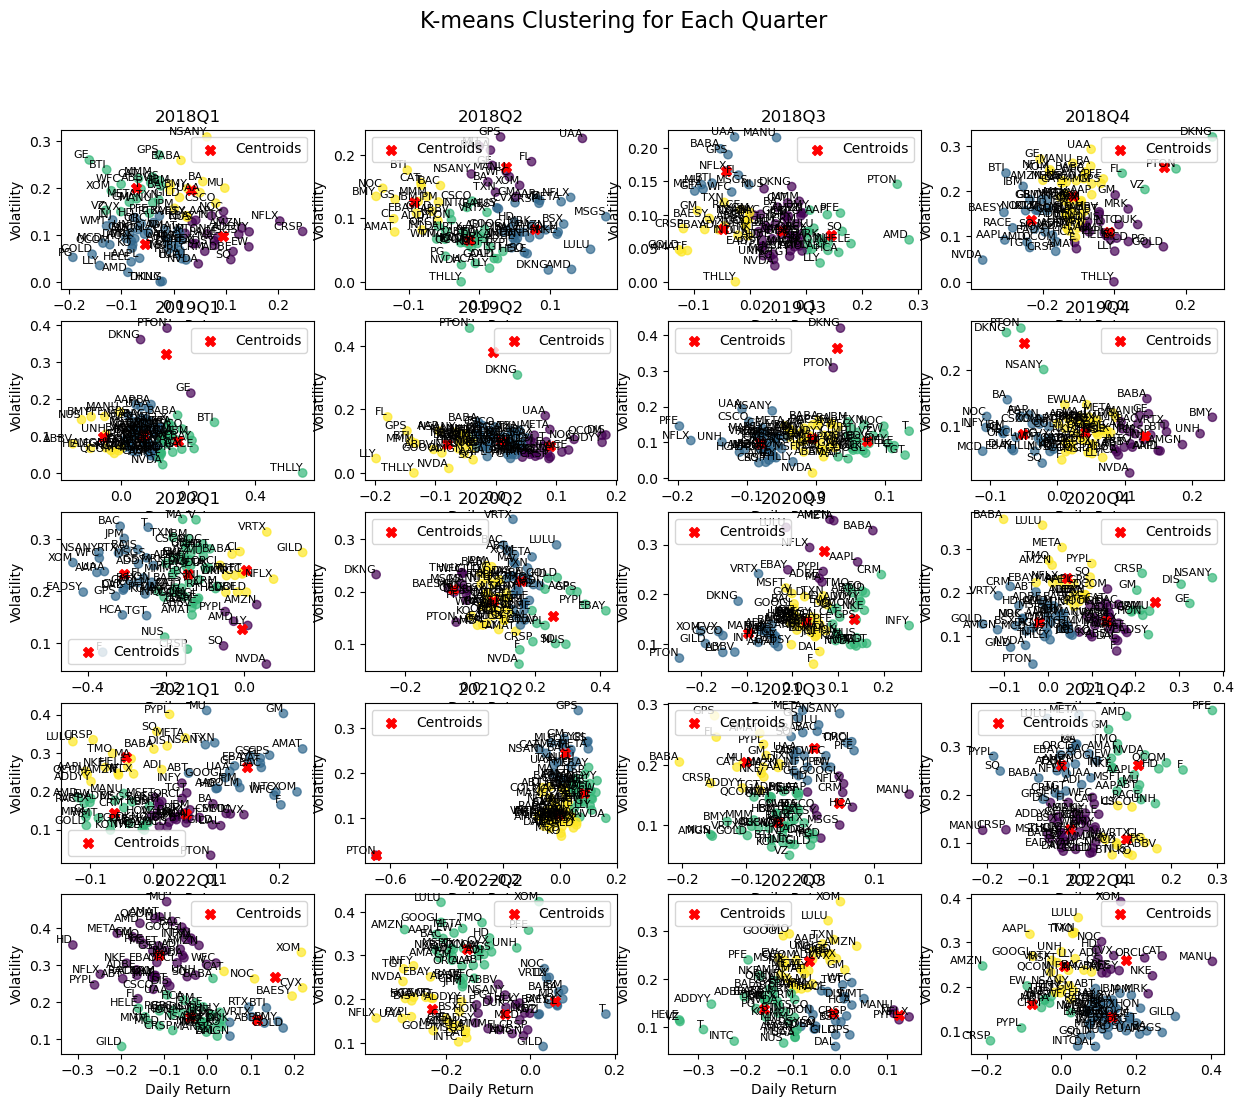

In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

result_data = []

silhouette_scores = []

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.suptitle('K-means Clustering for Each Quarter', fontsize=16)
axes = axes.flatten()

cluster_mapping = {}

for i, quarter_data in enumerate(quarterly_dataframes):
    df = quarter_data['Data'].dropna()

    # Remove specific stocks (ITC and BMW) since they are outliers
    df = df[(df['Stock'] != 'ITC') & (df['Stock'] != 'BMW')]

    # Perform K-means clustering
    features = df[['AvgDailyReturn', 'AvgVolatility']]
    init_centers = np.array([[-0.2, 0], [-0.2, 0.3], [0.3, 0.3], [0.3, 0]])
    kmeans = KMeans(n_clusters=4, init=init_centers)

    df['Cluster'] = kmeans.fit_predict(features)

    # Assign new cluster labels consistently across quarters
    if i == 0:
        # If it's the first quarter, create a mapping based on the initial clustering
        cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(df['Cluster'].unique())}
    else:
        current_mapping = {old_label: new_label for new_label, old_label in enumerate(df['Cluster'].unique())}
        cluster_mapping = {old_label: cluster_mapping[new_label] for old_label, new_label in current_mapping.items()}

    df['Cluster'] = df['Cluster'].map(cluster_mapping)

    title = quarter_data['Quarter']
    print(f"\nTitle for Quarter {i + 1}: {title}")

    # Print coordinates of centroids
    centroids = kmeans.cluster_centers_
    for cluster_num, center in enumerate(centroids):
        print(f"Centroid for Cluster {cluster_mapping[cluster_num]}: {center}")

    # Determine silhouette score
    silhouette_coefficient = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(silhouette_coefficient)
    print(f"Silhouette Coefficient for {title}: {silhouette_coefficient}")
    
    # Determine Buy Cluster
    buy_cluster = cluster_mapping[np.argmax(centroids[:, 0] - centroids[:, 1])]

    # Print stocks in the 'Buy Cluster'
    stocks_in_buy_cluster = df[df['Cluster'] == buy_cluster]['Stock'].tolist()
    print(f"\nStocks in Buy Cluster for {title}:")
    print(stocks_in_buy_cluster)

    # Determine Sell Cluster
    sell_cluster = cluster_mapping[np.argmin(centroids[:, 0] + centroids[:, 1])]

    # Determine Stay Clusters
    stay_clusters = [cluster_mapping[label] for label in range(4) if label not in [buy_cluster, sell_cluster]]

    # Store cluster information in the result list
    result_data.append({
        'Quarter': title,
        'Buy Cluster': buy_cluster,
        'Sell Cluster': sell_cluster,
        'Stay Cluster': stay_clusters,
    })

    # Plot the clusters with annotations on the current subplot
    scatter = axes[i].scatter(df['AvgDailyReturn'], df['AvgVolatility'], c=df['Cluster'], cmap='viridis', alpha=0.7)

    for j, txt in enumerate(df['Stock']):
        axes[i].annotate(txt, (df['AvgDailyReturn'].iloc[j], df['AvgVolatility'].iloc[j]), fontsize=8, ha='right', va='bottom')

    # Plot centroids
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=50, c='red', marker='X', label='Centroids')

    axes[i].set_title(title)
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Volatility')
    axes[i].legend()


# Create a DataFrame with quarters and silhouette coefficients
silhouette_df = pd.DataFrame({
    'Quarter': [quarter_data['Quarter'] for quarter_data in quarterly_dataframes],
    'Silhouette Coefficient': silhouette_scores
})



Silhouette coefficient for each quarter, in descending order

In [40]:
# Sort silhouette_df by 'Silhouette Coefficient' in descending order
silhouette_df = silhouette_df.sort_values(by='Silhouette Coefficient', ascending=False)

silhouette_df


,Quarter,Silhouette Coefficient
7,2019Q4,0.421380
13,2021Q2,0.410041
8,2020Q1,0.399563
1,2018Q2,0.397093
10,2020Q3,0.393570
12,2021Q1,0.384866
17,2022Q2,0.378645
16,2022Q1,0.377780
19,2022Q4,0.375390
11,2020Q4,0.368901


Printing the stocks to buy for each quarter

In [34]:
buy_cluster_stocks_df = buy_cluster_stocks_df.transpose()
buy_cluster_stocks_df = buy_cluster_stocks_df.rename(columns={'Stocks': 'Stocks to Buy'})
buy_cluster_stocks_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Quarter,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
Stocks to Buy,"[AAP, ADBE, ADDYY, AMZN, BSX, COLM, CRM, CRSP,...","[AAP, ADBE, AMD, AMGN, AMZN, BAESY, BSX, COLM,...","[AAP, AAPL, ABT, AMD, BMY, BSX, EW, HCA, HELE,...","[DKNG, FL, PTON, VZ]","[ADI, AMD, BABA, BTI, CL, COLM, CSCO, EADSY, E...","[ADDYY, AMAT, BSX, CRSP, DAL, DIS, F, GOLD, HE...","[AAPL, AMAT, BAESY, BMY, BTI, DUK, EW, GOLD, G...","[AAPL, ABBV, ADBE, AMAT, AMD, AMGN, BABA, BAC,...","[AMD, AMZN, LLY, NVDA, PYPL, SQ]","[AAP, AAPL, ABBV, ADBE, AMZN, CRSP, EBAY, F, G...","[ABT, ADDYY, AMD, CAT, CRM, DIS, DUK, GM, GPS,...","[CRSP, DIS, EADSY, GE, GM, GS, HON, JPM, MU, N...","[AMGN, BA, BAESY, BMY, BSX, BTI, CSCO, CVX, DA...","[AAP, AAPL, ADBE, ADDYY, ADI, AMZN, CRM, CRSP,...","[AAP, BAESY, CRM, CSCO, GOOGL, HCA, MANU, MCD,...","[ABBV, BTI, CL, CSCO, CVX, DUK, JNJ, KO, LLY, ...","[ABBV, AMGN, BMY, BTI, DUK, GOLD, RTX, VRTX]","[BABA, BAESY, BMY, BTI, CL, GILD, IBM, LLY, MR...","[FL, MANU, NFLX, PYPL]","[ABBV, ABT, ADBE, ADDYY, AMGN, BA, BABA, BSX, ..."


In [41]:
import pandas as pd
import numpy as np

# Data for Stocks in Buy Cluster for each quarter
buy_cluster_data = {
    '2018Q1': ['AAP', 'ADBE', 'ADDYY', 'AMZN', 'BSX', 'COLM', 'CRM', 'CRSP', 'EADSY', 'EBAY', 'EW', 'INFY', 'INTC', 'MA', 'MSGS', 'NFLX', 'NOC', 'NUS', 'NVDA', 'PTON', 'RACE', 'SQ'],
    '2018Q2': ['AAP', 'ADBE', 'AMD', 'AMGN', 'AMZN', 'BAESY', 'BSX', 'COLM', 'CRM', 'CRSP', 'CVX', 'DIS', 'DKNG', 'GOOGL', 'HD', 'HELE', 'INFY', 'LULU', 'MA', 'META', 'MRK', 'MSGS', 'NFLX', 'NKE', 'NUS', 'PYPL', 'RACE', 'SQ', 'UNH', 'V', 'VZ'],
    '2018Q3': ['AAP', 'AAPL', 'ABT', 'AMD', 'BMY', 'BSX', 'EW', 'HCA', 'HELE', 'HON', 'JNJ', 'LLY', 'LULU', 'MRK', 'ORCL', 'PFE', 'PTON', 'QCOM', 'SQ'],
    '2018Q4': ['DKNG', 'FL', 'PTON', 'VZ'],
    '2019Q1': ['ADI', 'AMD', 'BABA', 'BTI', 'CL', 'COLM', 'CSCO', 'EADSY', 'EBAY', 'EW', 'HON', 'IBM', 'LULU', 'MA', 'META', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PYPL', 'RACE', 'RTX', 'TGT', 'THLLY', 'TMO', 'V'],
    '2019Q2': ['ADDYY', 'AMAT', 'BSX', 'CRSP', 'DAL', 'DIS', 'F', 'GOLD', 'HELE', 'HON', 'JPM', 'KO', 'MCD', 'META', 'MSFT', 'NOC', 'PYPL', 'QCOM', 'RACE', 'T', 'UAA', 'V', 'WMT'],
    '2019Q3': ['AAPL', 'AMAT', 'BAESY', 'BMY', 'BTI', 'DUK', 'EW', 'GOLD', 'GOOGL', 'HD', 'HELE', 'IBM', 'INTC', 'KO', 'MU', 'NKE', 'NOC', 'PG', 'T', 'TGT', 'TXN', 'VZ', 'WFC', 'WMT'],
    '2019Q4': ['AAPL', 'ABBV', 'ADBE', 'AMAT', 'AMD', 'AMGN', 'BABA', 'BAC', 'BMY', 'BTI', 'CAT', 'CRSP', 'GE', 'HCA', 'INTC', 'JNJ', 'JPM', 'MANU', 'MMM', 'MU', 'NVDA', 'TGT', 'UNH', 'VRTX'],
    '2020Q1': ['AMD', 'AMZN', 'LLY', 'NVDA', 'PYPL', 'SQ'],
    '2020Q2': ['AAP', 'AAPL', 'ABBV', 'ADBE', 'AMZN', 'CRSP', 'EBAY', 'F', 'GOLD', 'GPS', 'HD', 'NUS', 'NVDA', 'PYPL', 'SQ'],
    '2020Q3': ['ABT', 'ADDYY', 'AMD', 'CAT', 'CRM', 'DIS', 'DUK', 'GM', 'GPS', 'HCA', 'HON', 'INFY', 'KO', 'MCD', 'NKE', 'NUS', 'NVDA', 'PFE', 'PG', 'QCOM', 'SQ', 'TGT', 'TMO', 'VZ', 'WMT'],
    '2020Q4': ['CRSP', 'DIS', 'EADSY', 'GE', 'GM', 'GS', 'HON', 'JPM', 'MU', 'NSANY', 'UAA'],
    '2021Q1': ['AMGN', 'BA', 'BAESY', 'BMY', 'BSX', 'BTI', 'CSCO', 'CVX', 'DAL', 'DUK', 'EADSY', 'GILD', 'HCA', 'HON', 'IBM', 'INFY', 'JNJ', 'LLY', 'MCD', 'MMM', 'MSFT', 'NOC', 'ORCL', 'PTON', 'RTX', 'T', 'TGT', 'UNH', 'VZ'],
    '2021Q2': ['AAP', 'AAPL', 'ADBE', 'ADDYY', 'ADI', 'AMZN', 'CRM', 'CRSP', 'EBAY', 'EW', 'F', 'GOOGL', 'HELE', 'IBM', 'INFY', 'LLY', 'MSFT', 'NKE', 'NOC', 'NVDA', 'ORCL', 'PFE', 'TGT', 'V', 'WFC', 'XOM'],
    '2021Q3': ['AAP', 'BAESY', 'CRM', 'CSCO', 'GOOGL', 'HCA', 'MANU', 'MCD', 'MSGS', 'NFLX'],
    '2021Q4': ['ABBV', 'BTI', 'CL', 'CSCO', 'CVX', 'DUK', 'JNJ', 'KO', 'LLY', 'MCD', 'NUS', 'PG', 'VRTX'],
    '2022Q1': ['ABBV', 'AMGN', 'BMY', 'BTI', 'DUK', 'GOLD', 'RTX', 'VRTX'],
    '2022Q2': ['BABA', 'BAESY', 'BMY', 'BTI', 'CL', 'GILD', 'IBM', 'LLY', 'MRK', 'NOC', 'T', 'VRTX', 'VZ'],
    '2022Q3': ['FL', 'MANU', 'NFLX', 'PYPL'],
    '2022Q4': ['ABBV', 'ABT', 'ADBE', 'ADDYY', 'AMGN', 'BA', 'BABA', 'BSX', 'BTI', 'CL', 'COLM', 'CSCO', 'DAL', 'DUK', 'EADSY', 'EBAY', 'FL', 'GE', 'GILD', 'GOLD', 'GPS', 'HCA', 'HELE', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MSGS', 'NFLX', 'NUS', 'NVDA', 'PG', 'RACE', 'RTX', 'SQ', 'T', 'UAA', 'VZ', 'WMT'],
}

buy_cluster_stocks_df = pd.DataFrame(list(buy_cluster_data.items()), columns=['Quarter', 'Stocks to Buy'])
buy_cluster_stocks_df


,Quarter,Stocks to Buy
0,2018Q1,"[AAP, ADBE, ADDYY, AMZN, BSX, COLM, CRM, CRSP,..."
1,2018Q2,"[AAP, ADBE, AMD, AMGN, AMZN, BAESY, BSX, COLM,..."
2,2018Q3,"[AAP, AAPL, ABT, AMD, BMY, BSX, EW, HCA, HELE,..."
3,2018Q4,"[DKNG, FL, PTON, VZ]"
4,2019Q1,"[ADI, AMD, BABA, BTI, CL, COLM, CSCO, EADSY, E..."
5,2019Q2,"[ADDYY, AMAT, BSX, CRSP, DAL, DIS, F, GOLD, HE..."
6,2019Q3,"[AAPL, AMAT, BAESY, BMY, BTI, DUK, EW, GOLD, G..."
7,2019Q4,"[AAPL, ABBV, ADBE, AMAT, AMD, AMGN, BABA, BAC,..."
8,2020Q1,"[AMD, AMZN, LLY, NVDA, PYPL, SQ]"
9,2020Q2,"[AAP, AAPL, ABBV, ADBE, AMZN, CRSP, EBAY, F, G..."


Top 20 High-Performing Stocks- with number of occurences in the 'Buy Cluster' across 5 years:

In [48]:
import pandas as pd
import numpy as np

# Identification of High-Performing Stocks
all_stocks = [stock for stocks in buy_cluster_stocks_df['Stocks to Buy'] for stock in stocks]
high_performing_stocks = pd.Series(all_stocks).value_counts()


print("\nTop 20 High-Performing Stocks- with number of occurences in the 'Buy Cluster' across 5 years:")
high_performing_stocks.head(20)



Top 20 High-Performing Stocks- with number of occurences in the 'Buy Cluster' across 5 years:


BTI     8
NVDA    8
SQ      7
VZ      7
CRSP    7
HON     7
BMY     6
AMD     6
HELE    6
PYPL    6
AAP     6
HCA     6
IBM     6
TGT     6
MCD     6
DUK     6
ADBE    6
LLY     6
NUS     6
BSX     6
Name: count, dtype: int64

In [49]:
spy_data = pd.read_csv('SPY.csv')
spy_data['Date'] = pd.to_datetime(spy_data['Date'])

# Create a new column for the quarter
spy_data['Quarter'] = spy_data['Date'].dt.to_period("Q")

spy_data['Quarter'].unique

<bound method Series.unique of 0       2018Q1
1       2018Q1
2       2018Q1
3       2018Q1
4       2018Q1
         ...  
1254    2022Q4
1255    2022Q4
1256    2022Q4
1257    2022Q4
1258    2022Q4
Name: Quarter, Length: 1259, dtype: period[Q-DEC]>

In [50]:
quarter = '2022Q4'
y = spy_data[(spy_data['Quarter'] == quarter)]
y['Return'].mean()


0.0012792323296832026

Comparing the mean returns of Buy cluster and SPY across 5 years

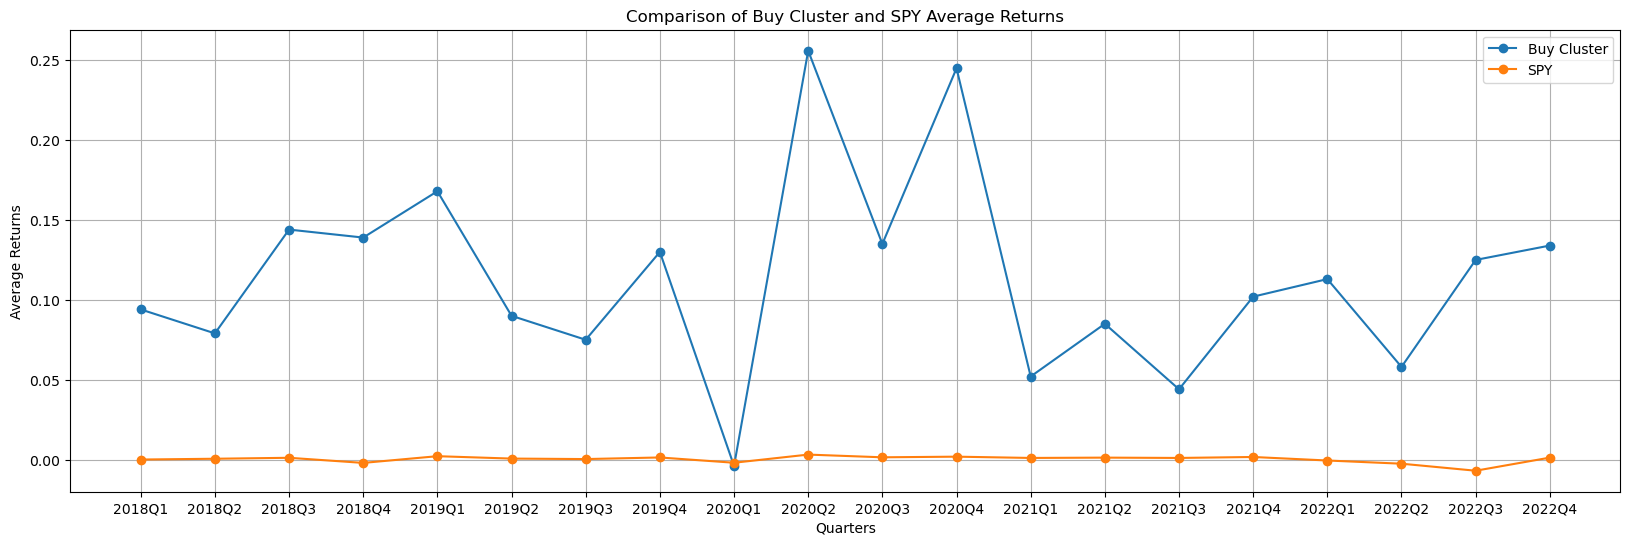

In [44]:
import matplotlib.pyplot as plt

y1 = [0.094, 0.079, 0.144, 0.139, 0.168, 0.090, 0.075, 0.130, -0.004, 0.256, 0.135, 0.245, 0.052, 0.085, 0.044, 0.102, 0.113, 0.058, 0.125, 0.134]
y2 = [0, 0.0005, 0.0011, -0.0021, 0.0021, 0.0006, 0.0003, 0.0013, -0.002, 0.0031, 0.0014, 0.0018, 0.0010, 0.0012, 0.001, 0.0016, -0.0006, -0.0026, -0.007, 0.0012]
x_labels = ['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4']

plt.figure(figsize=(20, 6))
plt.plot(x_labels, y1, label='Buy Cluster', marker='o')

plt.plot(x_labels, y2, label='SPY', marker='o')
plt.xlabel('Quarters')
plt.ylabel('Average Returns')
plt.title('Comparison of Buy Cluster and SPY Average Returns')
plt.legend()
plt.grid(True)
plt.show()
